## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [7]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [26]:
df[['TV','radio']].head()

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

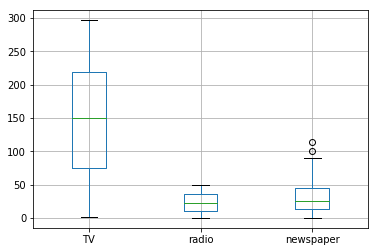

In [6]:
#df.boxplot()
df[['TV','radio','newspaper']].boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

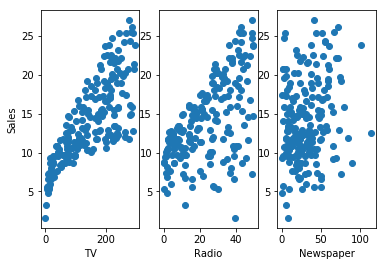

In [27]:
plt.subplot(1,3,1, xlabel = 'TV', ylabel = 'Sales')
plt.scatter(df.TV, df.sales)
plt.subplot(1,3,2, xlabel = 'Radio',)
plt.scatter(df.radio, df.sales)
plt.subplot(1,3,3, xlabel = 'Newspaper',)
plt.scatter(df.newspaper, df.sales)

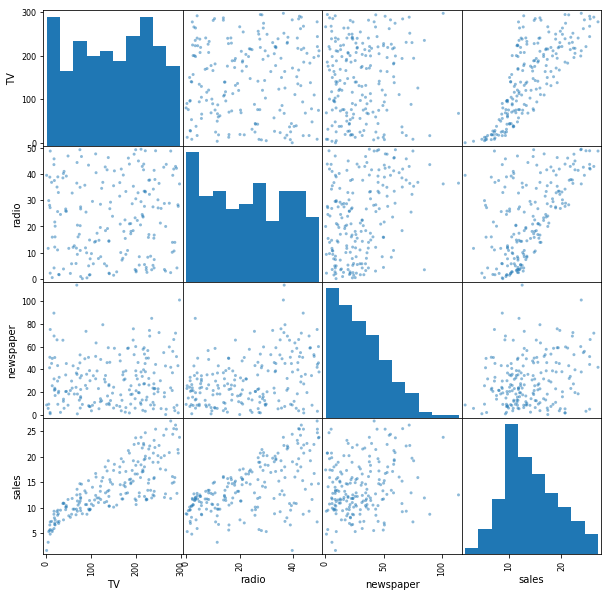

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [29]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(10,10))
plt.show()
df.corr()

Which of the variables seem correlated with one another? Which don't? Explain your answer

*It doesn't seem there's any strong correlation between the predictive variables, since as shown in the scatter plots, there isn't any structured pattern presented betweeen any two predictive variables. This could also be confirmed with the correlation matrix shown above. However, TV and radio tend to be correlated with the sales.*

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

from sklearn.linear_model import Lasso

a) Set y to be the sales in df

In [10]:
y = df.sales

b) Set X to be just the features described above in df

In [11]:
x = df.drop(['sales'],1)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

d) Train model on training data, and make predictions on testing data

In [36]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Prediction on testing data: \n', reg.predict(x_test))
print('Sum Squared Residuals: %.2f' % np.mean((reg.predict(x_test)-y_test)**2))

Coefficients: 
 [ 0.04558897  0.18653389 -0.00063032]
Prediction on testing data: 
 [ 12.5893486    6.57466309  15.51569107   9.76164334  14.08560255
  20.17829056  12.32800513  19.82963814  14.87331552  10.31222767
  10.12322859  20.67028922   6.53084946   6.01905104   3.57991965
  11.29258057  13.14446753  15.95278361   7.79731662  18.014187
   7.55638624  11.66008132  10.74032853   7.35587039  22.10561982
  10.2894642   10.54321563  14.89639115  10.0460676   20.54318186
   9.63429763  21.12541362  24.01131416   6.77913882  15.12282694
  19.16513974  18.44896906  19.54139302  16.23003217   9.43340198]
Sum Squared Residuals: 2.20


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [14]:
print('R^2 Score: %.2f' % reg.score(x_test, y_test))

R^2 Score: 0.93


*R^2 on testing data is 0.93. This is good since the R^2 is relatively high, which means approximately 93% variability is explained by this model.*

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

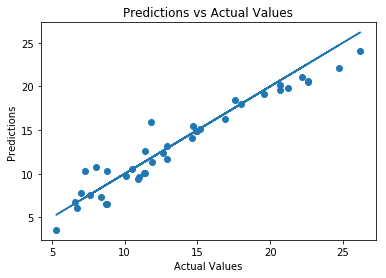

In [39]:
plt.scatter(y_test, reg.predict(x_test))
plt.plot(y_test, y_test, color='r')
plt.ylabel('Predictions')
plt.xlabel('Actual Values')
plt.title('Predictions vs Actual Values')
plt.show()

 *It looks like a good model since the predictions vs. actual values seem to closely fit a 45-degree linear line.*

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [43]:
pd.DataFrame({'Features':['TV','Radio','Newspaper'], 'Coefficient':reg.coef_})

,Coefficient,Features
0,0.045589,TV
1,0.186534,Radio
2,-0.000630,Newspaper


*We can measure the importance of features in this model by looking at the absolute value of corresponding coefficient. Before making any conclusions, we should standarize the data to get standarized coefficients and remove the collinear features.*

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

*We can conclude that TV and radio have positive effect on sales while newspaper has negative effect on sales. As the absolute value of radio's coefficent is the largest compared to that of other features, radio has relatively larger impact on sales.*  

*While all other factors are fixed, as advertising dollars spent on TV/radio/newspaper increase by 1 unit, the sales would change by 0.045589, 0.186534, and -0.000630 unit respectively.* 

*We should have normalized the data to make it have 0 mean and unit variance.*

In [64]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
x_scale = scaler.fit_transform(x)

x_scale_train, x_scale_test, y_scale_train, y_scale_test = train_test_split(x_scale, y, test_size=0.2, random_state=123)
reg_scale = LinearRegression()
reg_scale.fit(x_scale_train, y_scale_train)
print(pd.DataFrame({'Features':['TV','Radio','Newspaper'], 'Coefficient':reg_scale.coef_}))
print('Residual sum of squares: %.2f' % np.mean((reg_scale.predict(x_scale_test)-y_scale_test)**2))
print('R^2 Score: %.2f' % reg_scale.score(x_scale_test, y_scale_test))

   Coefficient   Features
0     3.904209         TV
1     2.762501      Radio
2    -0.013693  Newspaper
Residual sum of squares: 2.20
R^2 Score: 0.93


*After normalizing the data, we can see that the absolute value of TV's coefficient becomes the largest among all three features, and that of radio's becomes the second, while that of newspaper's still significantly small. This indicates that TV and radio have relatively large impact on sales compared to newspaper.*

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

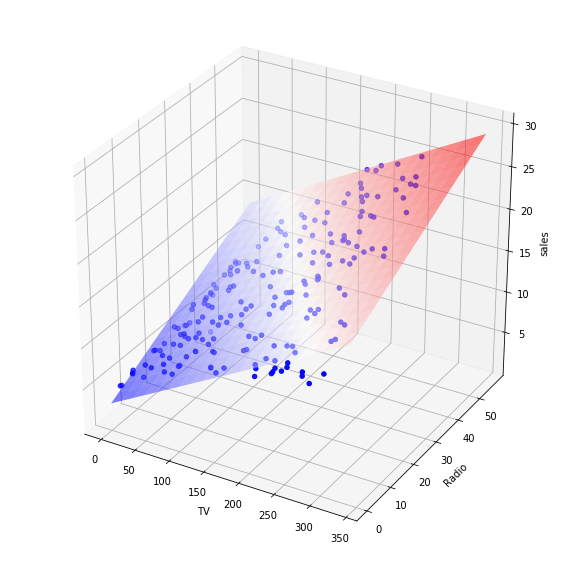

In [90]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#import statsmodels.formula.api as sm
from matplotlib import cm

reg_improve = LinearRegression()
reg_improve.fit(x[['TV','radio']], y)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 17)
y_surf = np.arange(0, 60, 3)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

x_new = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
y_new = reg_improve.predict(x_new)
ax.plot_surface(x_surf, y_surf,
                y_new.reshape(x_surf.shape),
                rstride=1, cstride=1,
                color='None', alpha = 0.5, cmap=cm.bwr)

ax.scatter(x['TV'], x['radio'], y, c='blue', marker='o')
ax.set_xlabel('TV')
ax.set_ylabel("Radio")
ax.set_zlabel('Sales')
plt.show()

*Since it seems there is some nonlinear interaction, we should consider adding an interaction term TV*radio into the model.*

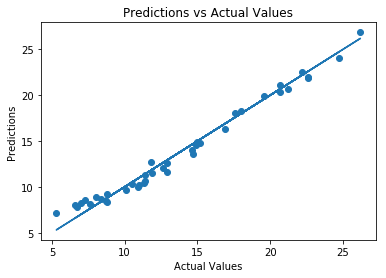

In [92]:
x['TV*radio'] = x['TV']*x["radio"]
X = x.drop(['newspaper'], 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

reg_improve2 = LinearRegression()
reg_improve2.fit(X_train, y_train)

plt.scatter(y_test, reg_improve2.predict(X_test))
plt.plot(y_test, y_test, color='r')
plt.ylabel('Predictions')
plt.xlabel('Actual Values')
plt.title('Predictions vs Actual Values')
plt.show()

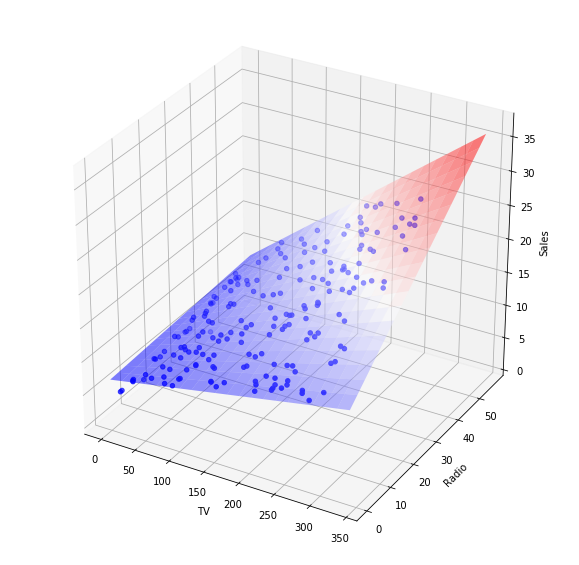

In [93]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 17)
y_surf = np.arange(0, 60, 3)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

x_new = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'radio': y_surf.ravel()})
x_new['TV*radio'] = x_new['TV']*x_new['radio']
y_new = reg_improve2.predict(x_new)
ax.plot_surface(x_surf, y_surf,
                y_new.reshape(x_surf.shape),
                rstride=1, cstride=1,
                color='None', alpha = 0.5, cmap=cm.bwr)

ax.scatter(x['TV'], x['radio'], y, c='blue', marker='o')
ax.set_xlabel('TV')
ax.set_ylabel("Radio")
ax.set_zlabel('Sales')
plt.show()

*As shown in both plots above, the new model with interaction term performs much better than the previous model.*

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


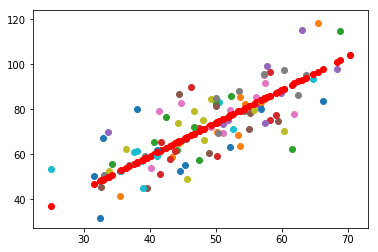

In [11]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate=0.0001):
    points = genfromtxt("data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


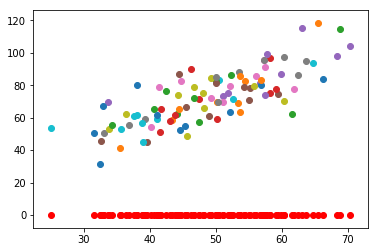

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0036367525276843242, m = 0.1842675743397763, error = 4291.042307005672


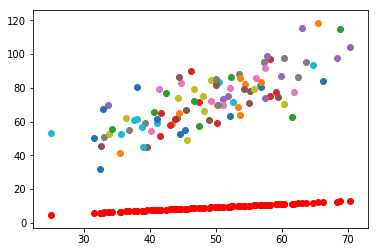

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.006822251476501262, m = 0.3455760774066343, error = 3314.6852979711575


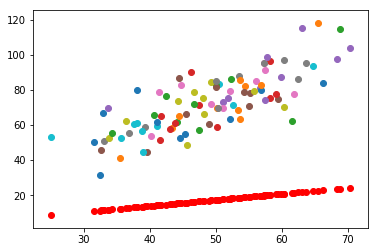

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.009612721311680747, m = 0.48678612160582196, error = 2566.4718119611753


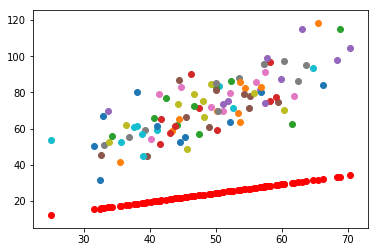

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.012057381145283187, m = 0.6104018979858353, error = 1993.0919765644169


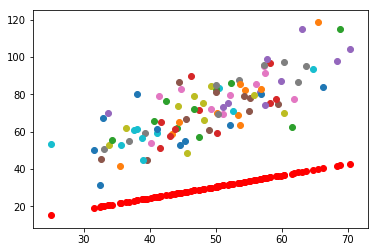

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.014199317576391524, m = 0.7186155849752736, error = 1553.6927380371988


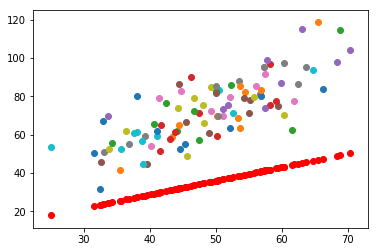

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.016076248778756144, m = 0.8133462239610552, error = 1216.9670996696568


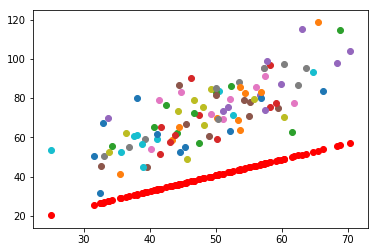

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.017721193386043766, m = 0.8962737511183847, error = 958.9235124054874


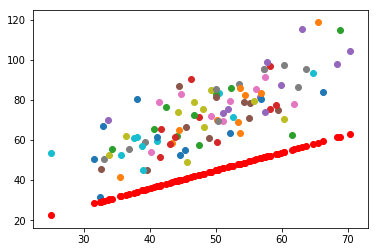

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.01916305603654446, m = 0.9688687890049613, error = 761.1764878040241


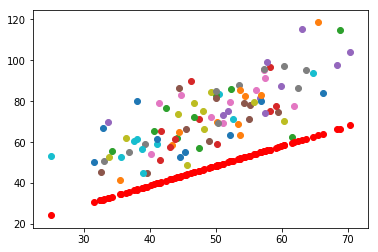

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.020427139961249337, m = 1.0324187262365758, error = 609.6366402900202


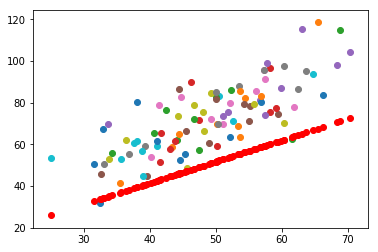

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


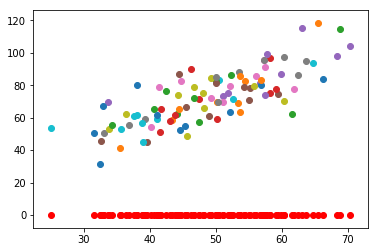

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0072735050553686485, m = 0.3685351486795526, error = 3186.2669183340686


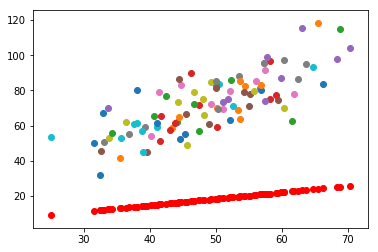

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.01274199579526775, m = 0.6452340122674316, error = 1845.2854193756275


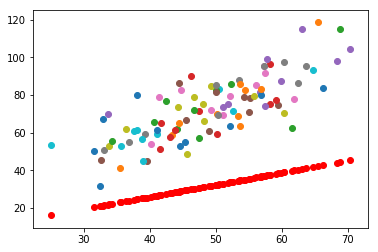

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.016855267941536783, m = 0.8529814900056218, error = 1089.3578680541548


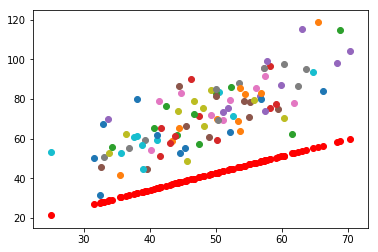

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.019951031565302785, m = 1.0089597394280754, error = 663.2323265001876


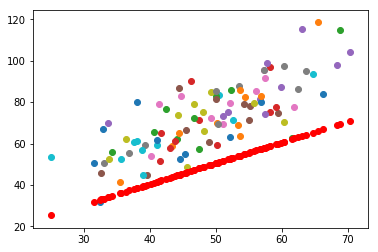

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.022282841973126334, m = 1.1260692559400733, error = 423.02017991777734


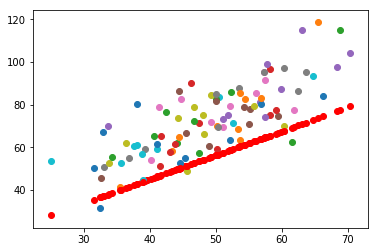

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02404107043012985, m = 1.2139958302447225, error = 287.60967009381125


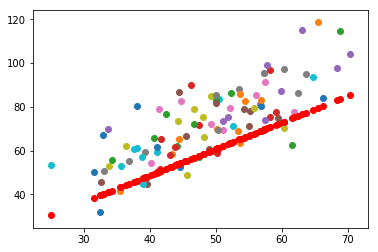

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.025368649139452446, m = 1.2800116281462905, error = 211.27711465249791


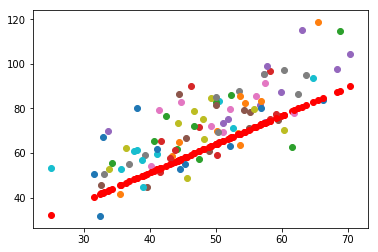

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.026372892693351885, m = 1.329576647398786, error = 168.24751899306284


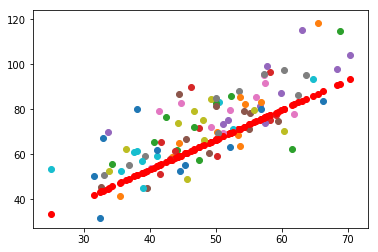

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.02713437370918469, m = 1.366790296112002, error = 143.99120588588545


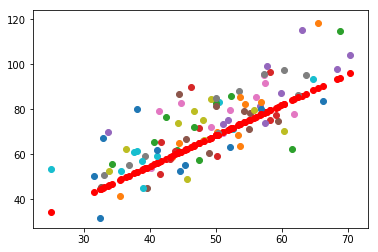

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


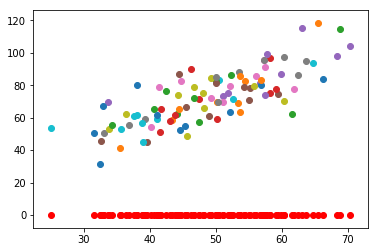

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


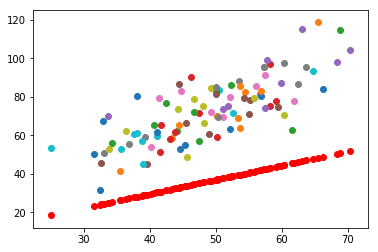

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


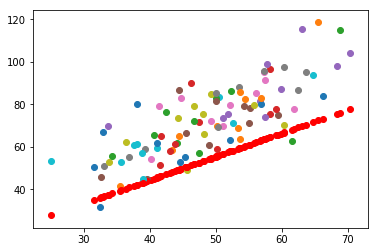

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


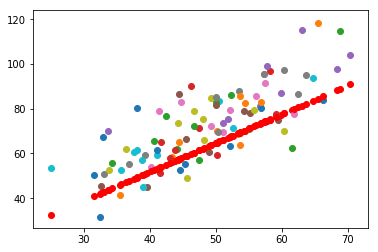

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


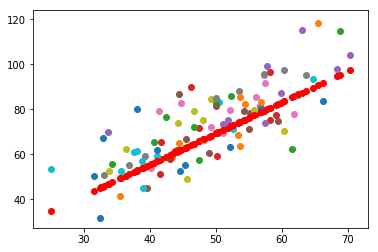

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


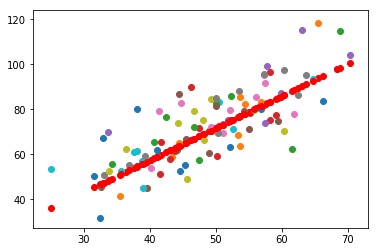

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


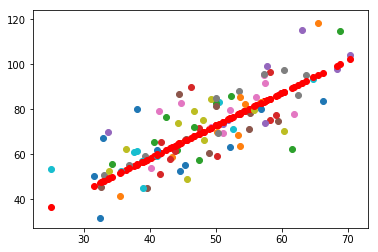

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


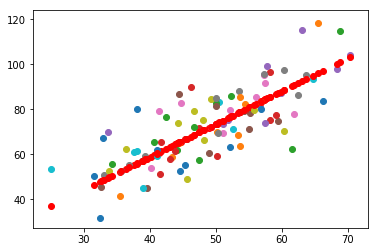

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


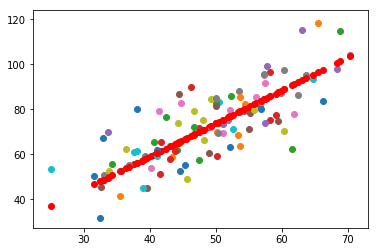

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


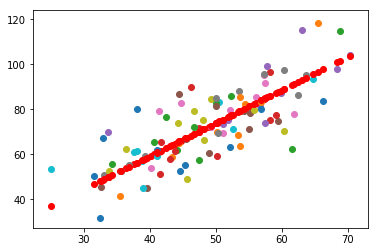

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


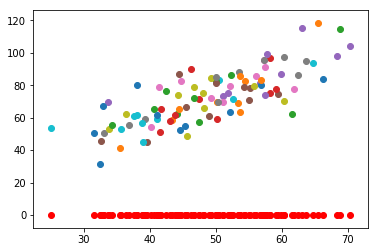

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.029094020221474594, m = 1.4741405947182105, error = 112.70750122899199


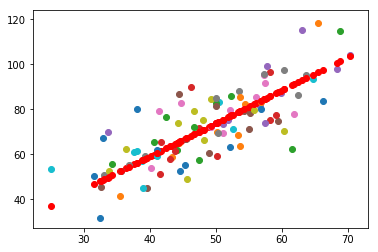

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.029307811395436454, m = 1.4789006279696415, error = 112.65052279457352


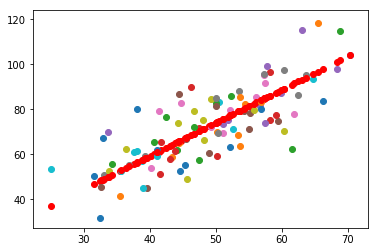

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.029428299719611955, m = 1.478913651241336, error = 112.65044995000876


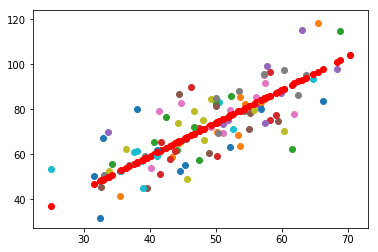

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.029548484809344765, m = 1.4789113387638853, error = 112.65037770154348


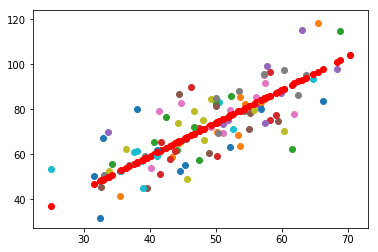

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.02966866711106594, m = 1.478908976778002, error = 112.65030545526567


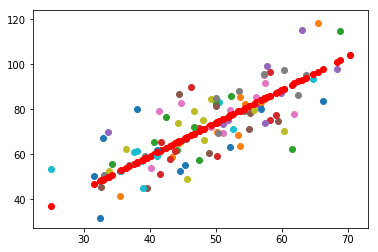

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02978884759543099, m = 1.4789066146677181, error = 112.65023321116905


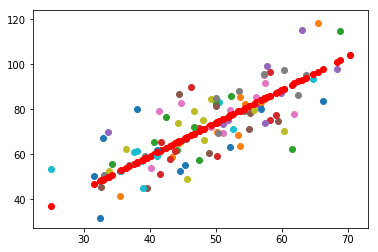

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.02990902626560303, m = 1.4789042525925749, error = 112.65016096925352


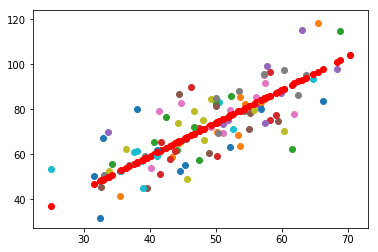

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.030029203121619573, m = 1.4789018905530862, error = 112.65008872951903


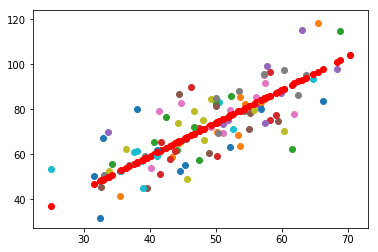

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.03014937816350804, m = 1.4788995285492539, error = 112.65001649196543


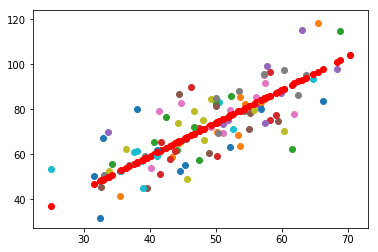

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


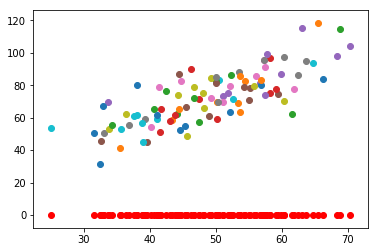

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.05818804044294919, m = 2.948281189436421, error = 5494.876051554403


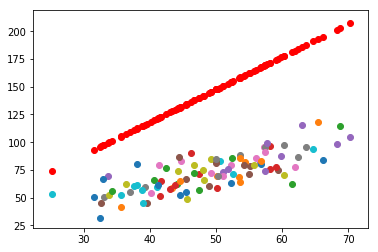

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0008551646958474546, m = 0.019040133005722826, error = 5425.548903532563


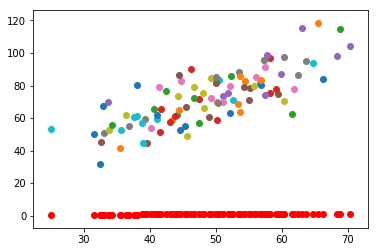

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.05829678234050579, m = 2.9293452426042537, error = 5357.114738058191


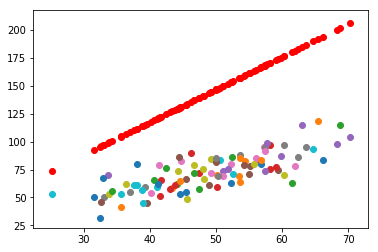

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.0017054776406117411, m = 0.0378348940251243, error = 5289.562052862701


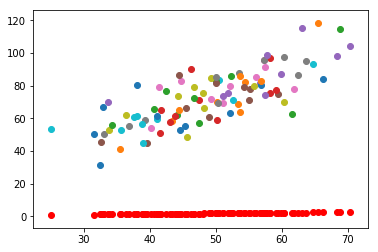

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.05841028677277326, m = 2.9106530834885644, error = 5222.879493835148


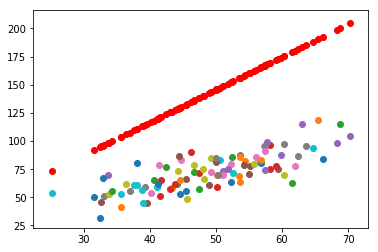

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0025510009562452057, m = 0.05638744363626502, error = 5157.055853113861


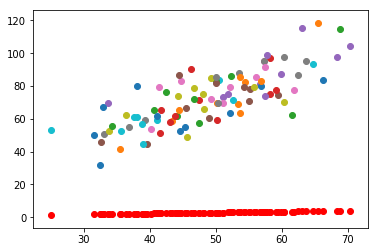

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.05852849202267843, m = 2.8922015719324805, error = 5092.080067202602


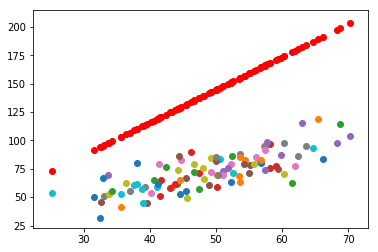

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.0033917959645461543, m = 0.0747009017066449, error = 5027.94121511106


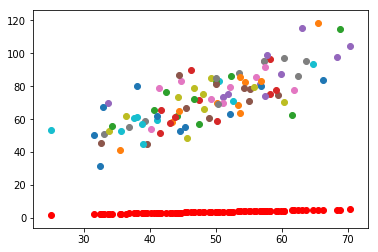

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.05865133716813143, m = 2.8739876082266385, error = 4964.628516519291


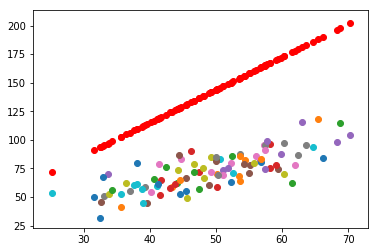

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


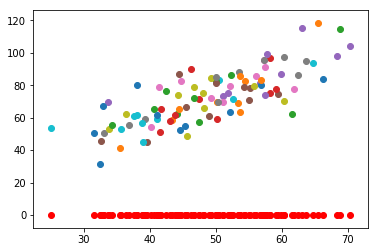

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.05964274145402291, m = 3.0219882191723313, error = 6048.391912264637


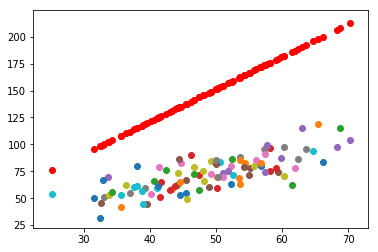

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.0020836796641264116, m = -0.13109537121947934, error = 6574.512391299633


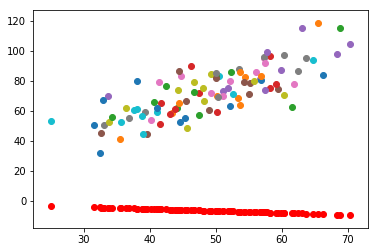

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.06282370420473948, m = 3.158750354079386, error = 7147.266120674546


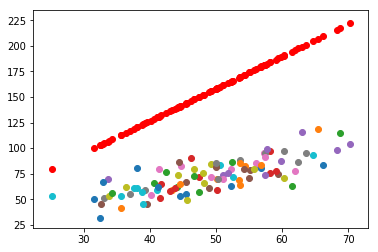

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -0.004395756088694414, m = -0.2738096582892031, error = 7770.78648715317


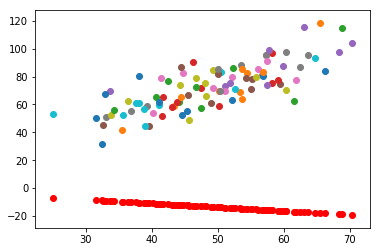

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.06624290861703767, m = 3.307635402438555, error = 8449.573244544663


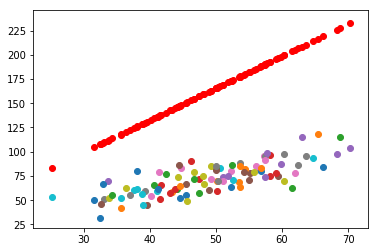

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -0.006956470753607238, m = -0.4291727159828289, error = 9188.52498702857


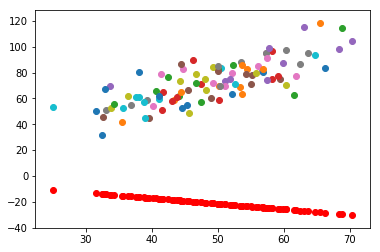

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.06992147419399282, m = 3.4697178912700855, error = 9992.974500786962


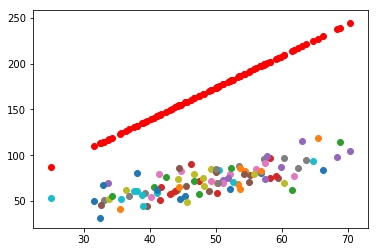

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -0.00978785926361106, m = -0.5983056813256269, error = 10868.727249065116


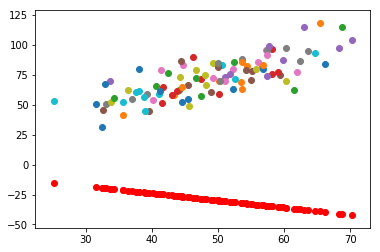

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.0738823923876874, m = 3.6461675894169847, error = 11822.103268396037


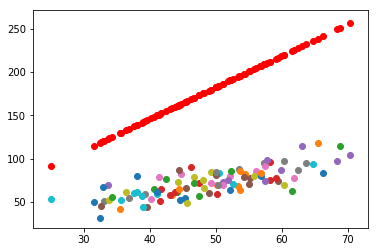

In [156]:
learning_rates=[0.000025, 0.00005, 0.0001, 0.0002, 0.0004, 0.00041]
for rate in learning_rates:
    for num in range(0,10):
        run(num, learning_rate=rate)
        plt.show()

In [82]:
def run2(num_iterations, learning_rate):
    points = genfromtxt("data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    errors = compute_error_for_line_given_points(b, m, points)
    return [b, m, errors]

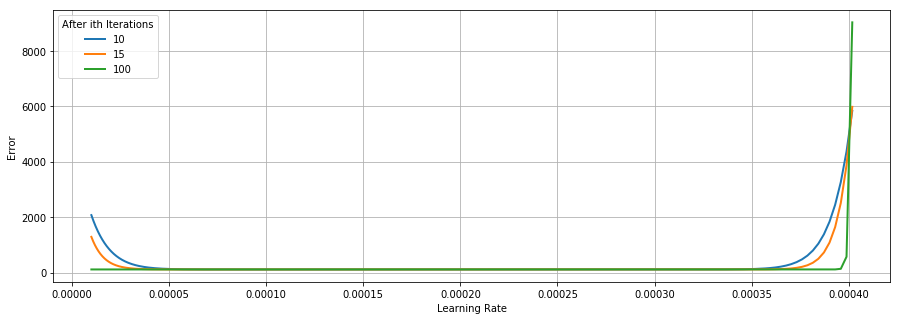

In [155]:
plt.figure(figsize=(15, 5))

iterations=[10, 15, 100]
learning_rates = np.logspace(-5,-3.396,500)

for num in iterations:
    error = []
    for rate in learning_rates:
        error.append(run2(num, rate)[2])
    plt.plot(learning_rates, error, label=num, lw=2)
plt.xlabel("Learning Rate")
plt.ylabel("Error")
plt.grid()
plt.legend(title="After ith Iterations", loc='upper left')

$\theta_j:=\theta_j-\alpha\triangledown_{\theta_j} J(\theta)$, where $J(\theta)$ is the cost function and $\alpha$ is the learning rate. The learning rate is the step size that the gradient descent method uses to minimize a given convex function and it determines how fast or slow we will move towards the optimal weights. For suffciently small $\alpha$, $J(\theta)$ should decrease every iteration. But if $\alpha$ is too small, gradient descent can be slow to converge and it would need too many iterations to converge to the best values. On the other hand, if $\alpha$ is too large, $J(\theta)$ may not decrease on every iteration and may not converge as we may skip the optimal solution.   

In [146]:
learning_rates=[0.000025, 0.00005, 0.0001, 0.0002, 0.0004, 0.00041]
iterations=[10, 15, 100]

error = np.empty([6,3])
for rate in learning_rates:
    for num in iterations:
        error[learning_rates.index(rate),iterations.index(num)]=run2(num, rate)[2]
print(error)

[[  4.93506825e+02   2.13307882e+02   1.12649764e+02]
 [  1.30317620e+02   1.13656060e+02   1.12648861e+02]
 [  1.12655852e+02   1.12650130e+02   1.12647057e+02]
 [  1.12649944e+02   1.12649583e+02   1.12643452e+02]
 [  4.90213133e+03   4.60151512e+03   1.60390251e+03]
 [  1.28599828e+04   1.96035934e+04   2.65989803e+07]]


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

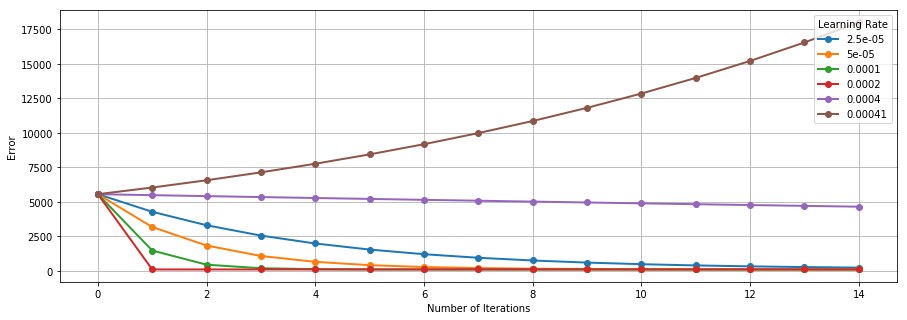

In [130]:
plt.figure(figsize=(15, 5))

learning_rates=[0.000025, 0.00005, 0.0001, 0.0002, 0.0004, 0.00041]
for rate in learning_rates:
    error = np.empty([15,1])
    for num in range(0,15):
        error[num,0]=run2(num, rate)[2]
    plt.plot(error, label=rate, lw=2, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.grid()
plt.legend(title="Learning Rate", loc='upper right' )